# Python for Finance: Historical Volatility & Risk-Return Ratios
Youtube: https://www.youtube.com/watch?v=j4c2XqiJzRU&list=PLqpCwow11-Oq_ENXbaHso3WqUjRq_xhRG&index=4

Github: https://github.com/TheQuantPy/youtube-tutorials/blob/main/2021/002%20Apr-Jun/2021-05-11%20Python%20for%20Finance_%20Historical%20Volatility%20_%20Risk-Return%20Ratios.ipynb

Compute and track volatility over time
We also look at the folowing:
- Sharpe ratio
- Sortino ratio
- Modigliani ratio (M2 ratio)
- Max Drawdown

In [3]:
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

import yfinance as yf

# Get stock data with pandas_datareader

In [6]:
end = dt.datetime.now()
start = dt.datetime(2015,1,1)

yf.pdr_override()

df = pdr.get_data_yahoo(['SPY', 'GOOG','NVDA','META','AAPL'], start, end)
Close = df.Close
Close.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,GOOG,META,NVDA,SPY
Date,,,,,
2015-01-02,27.332500,26.168653,78.449997,5.0325,205.429993
2015-01-05,26.562500,25.623152,77.190002,4.9475,201.720001
2015-01-06,26.565001,25.029282,76.150002,4.7975,199.820007
2015-01-07,26.937500,24.986401,76.150002,4.7850,202.309998
2015-01-08,27.972500,25.065184,78.180000,4.9650,205.899994


## Compute log returns

In [10]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Ticker,AAPL,GOOG,META,NVDA,SPY
Date,,,,,
2015-01-05,-0.028576,-0.021066,-0.016191,-0.017034,-0.018225
2015-01-06,0.000094,-0.023450,-0.013565,-0.030787,-0.009464
2015-01-07,0.013925,-0.001715,0.000000,-0.002609,0.012384
2015-01-08,0.037703,0.003148,0.026309,0.036927,0.017589
2015-01-09,0.001072,-0.013035,-0.005644,0.004020,-0.008046
...,...,...,...,...,...
2024-02-14,-0.004821,0.005247,0.028200,0.024270,0.009047
2024-02-15,-0.001576,-0.021988,0.022460,-0.016949,0.006876
2024-02-16,-0.008466,-0.015261,-0.022375,-0.000620,-0.004992


## Calculate daily standard deviation

In [11]:
daily_std = log_returns.std()
daily_std

Ticker
AAPL    0.018235
GOOG    0.017965
META    0.024206
NVDA    0.030017
SPY     0.011436
dtype: float64

In [12]:
annualized_vol = daily_std * np.sqrt(252)
annualized_vol*100

Ticker
AAPL    28.946715
GOOG    28.519185
META    38.425524
NVDA    47.651206
SPY     18.154042
dtype: float64

## Plot histogram of log returns with annualized volatility

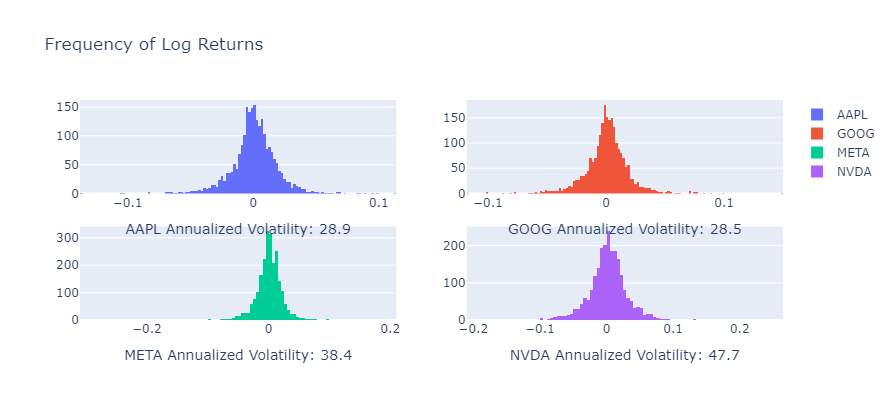

In [32]:
fig = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=log_returns['AAPL'], name='AAPL')
trace1 = go.Histogram(x=log_returns['GOOG'], name='GOOG')
trace2 = go.Histogram(x=log_returns['META'], name='META')
trace3 = go.Histogram(x=log_returns['NVDA'], name='NVDA')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)


fig.update_layout(autosize = False, width=600, height=400, title='Frequency of Log Returns',
                  xaxis=dict(title='AAPL Annualized Volatility: ' + str(np.round(annualized_vol['AAPL']*100, 1))),
                  xaxis2=dict(title='GOOG Annualized Volatility: ' + str(np.round(annualized_vol['GOOG']*100, 1))),
                  xaxis3=dict(title='META Annualized Volatility: ' + str(np.round(annualized_vol['META']*100, 1))),
                  xaxis4=dict(title='NVDA Annualized Volatility: ' + str(np.round(annualized_vol['NVDA']*100, 1))),
                 )

fig.show()

## Trailing volatility over time

In [33]:
TRADING_DAYS = 60
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

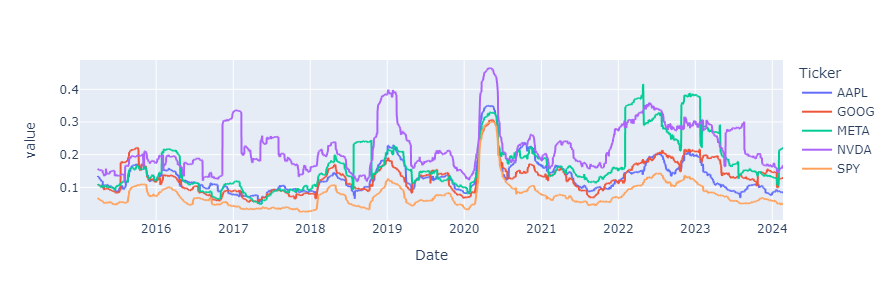

In [35]:
volatility.plot().update_layout(autosize=False, width=600, height=300)

## Sharpe Ratio

## Sortino Ratio

## Modigliani ratio (M2 ratio)

## Max Drawdown

In [40]:
def max_drawdown(returns):
    cumulative_returns = (returns+1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns/peak)-1
    return drawdown.min()
    
returns = df.Close.pct_change()
max_drawdowns = returns.apply(max_drawdown, axis=0)
max_drawdowns*100

Ticker
AAPL   -38.729695
GOOG   -44.601850
META   -76.736092
NVDA   -66.362059
SPY    -34.104747
dtype: float64

## Calmar Ratio